In [4]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.shape

(1025, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
# average age of patients in the dataset
df['age'].mean()

54.43414634146342

In [10]:
# gender distribution of patients (1= Male, 0= Female)
df['sex'].value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [11]:
# average resting blood pressure of patients
df['trestbps'].mean()

131.61170731707318

In [12]:
# patients have fasting blood sugar levels higher than 120 mg/dl
df['fbs'].sum()

153

In [13]:
# different types of chest pain recorded in the dataset
df['cp'].unique()

array([0, 1, 2, 3])

In [14]:
# maximum heart rate achieved by patients
df['thalach'].max()

202

In [15]:
# percentage of patients experience exercise-induced angina
df['exang'].mean() * 100

33.65853658536586

In [16]:
# average cholesterol level in the dataset
df['chol'].mean() 

246.0

In [17]:
# atients have a resting electrocardiographic result of 2
df['restecg'].value_counts()[2]

15

In [18]:
# distribution of the number of major vessels colored by fluoroscopy
df['ca'].value_counts() 

ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64

In [19]:
# correlation between age and cholesterol levels
df[['age', 'chol']].corr()

,age,chol
age,1.000000,0.219823
chol,0.219823,1.000000


<Figure size 1200x600 with 0 Axes>

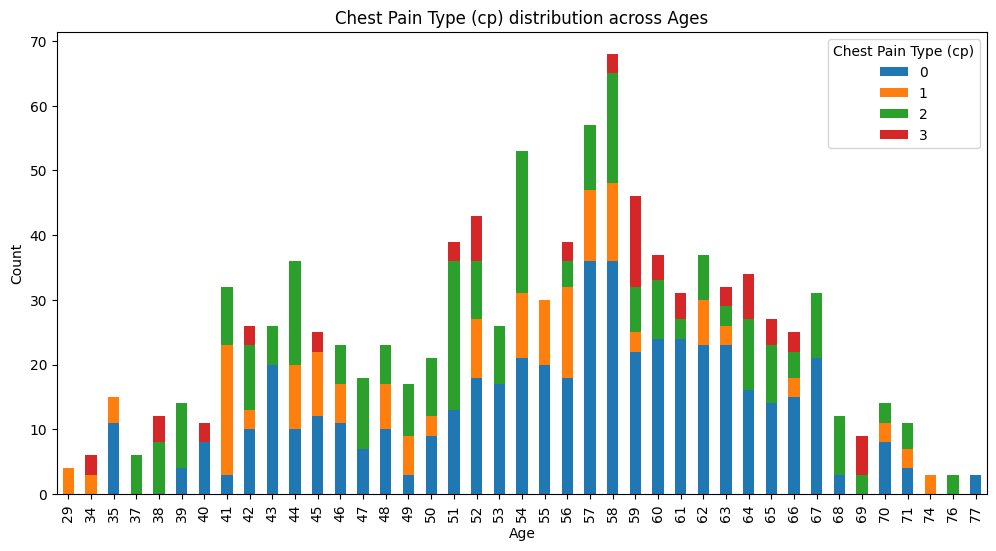

In [20]:
# distribution of chest pain types across different age groups(0:Typical angina, 1:Atypical angina, 
# 2:Non-anginal pain, 3:Asymptomatic)

plt.figure(figsize=(12,6))
df.groupby('age')['cp'].value_counts().unstack().plot(
    kind='bar',
    stacked=True,
    figsize=(12,6)
)
plt.title("Chest Pain Type (cp) distribution across Ages")
plt.ylabel("Count")
plt.xlabel("Age")
plt.legend(title="Chest Pain Type (cp)")
plt.show()

In [21]:
df[['cp','age']].corr()

,cp,age
cp,1.000000,-0.071966
age,-0.071966,1.000000


In [22]:
#  maximum heart rate vary with exercise-induced angina?
# (Exercise induced angina,Maximum heart rate achieved)

df.groupby('exang')['thalach'].mean() 

exang
0    155.342647
1    136.837681
Name: thalach, dtype: float64

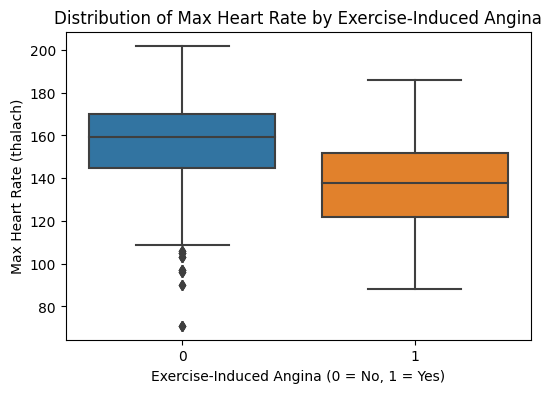

In [23]:
plt.figure(figsize=(6,4))
sns.boxplot(x='exang', y='thalach', data=df)
plt.title("Distribution of Max Heart Rate by Exercise-Induced Angina")
plt.xlabel("Exercise-Induced Angina (0 = No, 1 = Yes)")
plt.ylabel("Max Heart Rate (thalach)")
plt.show()

In [24]:
 # significant difference in resting blood pressure between male and female patients
df[['sex','trestbps']].corr() 

,sex,trestbps
sex,1.000000,-0.078974
trestbps,-0.078974,1.000000


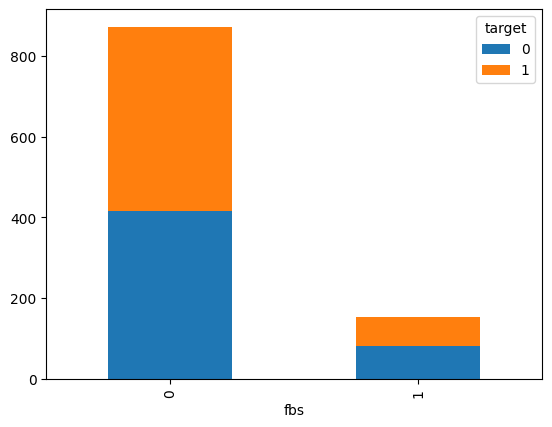

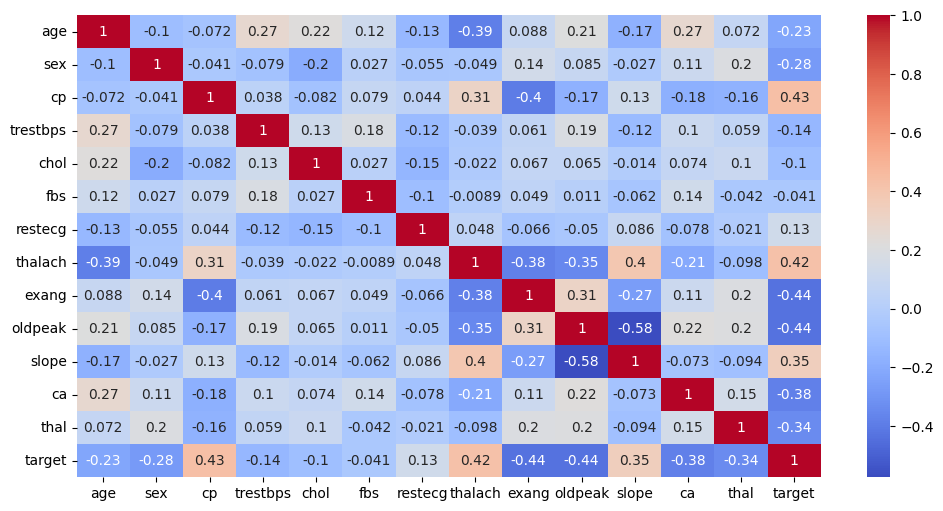

fbs
0    0.521789
1    0.464052
Name: target, dtype: float64

In [25]:
# relationship between fasting blood sugar levels and the presence of heart disease
pd.crosstab(df['fbs'], df['target']).plot(kind='bar', stacked=True)
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Mean heart disease by fbs
df.groupby('fbs')['target'].mean()

In [26]:
#  average oldpeak value for patients with different types of chest pain?
df.groupby('cp')['oldpeak'].mean()

cp
0    1.438833
1    0.323952
2    0.784507
3    1.380519
Name: oldpeak, dtype: float64

In [27]:
# common combinations of risk factors in patients with heart disease?
df[df['target'] == 1].groupby(['cp', 'fbs', 'exang', 'thal']).size().reset_index(name='counts').sort_values(by='counts', ascending=False) 

,cp,fbs,exang,thal,counts
15,2,0,0,2,133
8,1,0,0,2,97
1,0,0,0,2,73
19,2,1,0,2,32
16,2,0,0,3,19
4,0,0,1,2,18
23,3,0,0,2,16
9,1,0,0,3,15
17,2,0,1,2,13
24,3,0,0,3,10


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


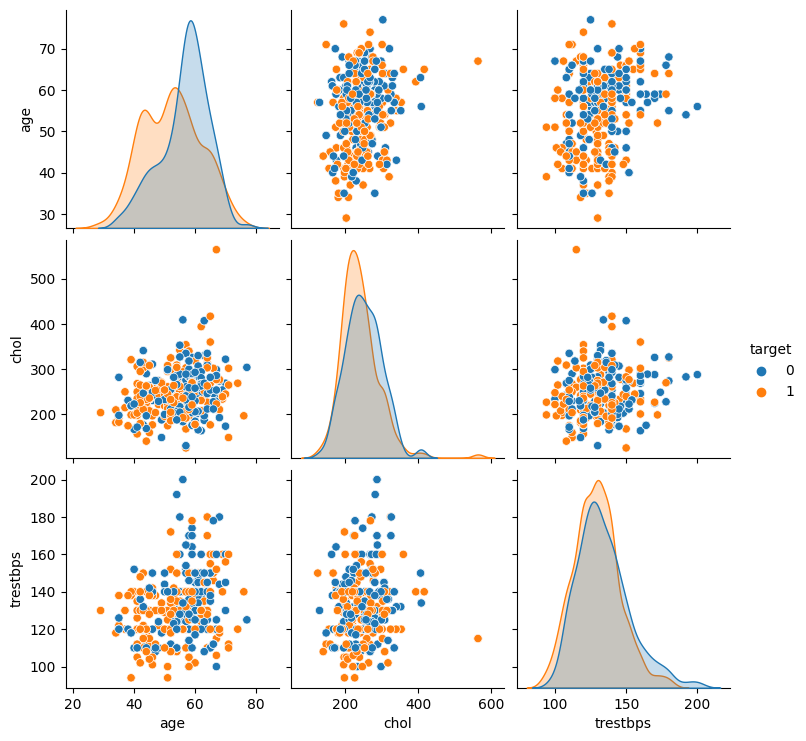

In [28]:
 # effect of combining multiple risk factors (age, cholesterol, blood pressure) on the likelihood of
# heart disease?
sns.pairplot(df, hue='target', vars=['age', 'chol', 'trestbps'])

In [29]:
# clinical measurement has the strongest correlation with heart disease presence?
df.corr()['target'].sort_values(ascending=False)

target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64

<Axes: xlabel='cp'>

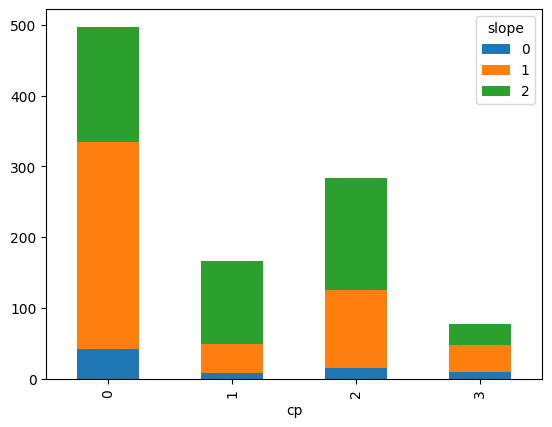

In [30]:
df.groupby('cp')['slope'].value_counts().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='age', ylabel='thal'>

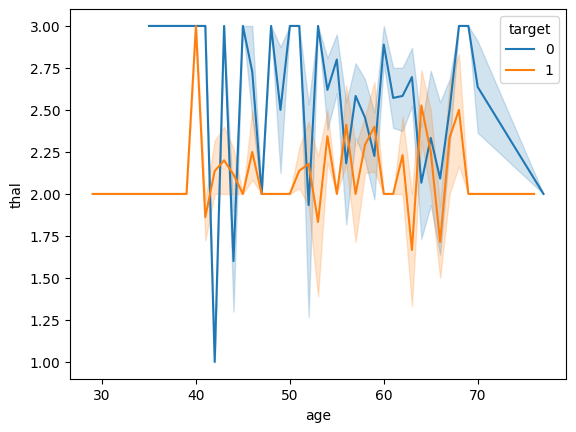

In [31]:
# survival rates of patients with different thalassemia types over a period.
sns.lineplot(x='age', y='thal', hue='target', data=df)

1. The correlation between age and the  cholesterol level is weak so older patients tend to have slightly higher cholesterol, but the relationship is not strong enough to say age reliably predicts cholesterol.
2. The correlation between chest pain and age is negative, so it indicates there is no correlation.
3. On analyzing maximum heart rate (thalach) by exercise-induced angina (exang), patients without angina (exang=0) had an average thalach of 155.34 bpm, whereas patients with angina (exang=1) had an verage of 136.83 bpm. This suggests that patients who experience angina during exercise are unable to reach higher heart rates, reflecting reduced cardiovascular capacity and higher likelihood of heart disease. The distribution also shows that while most angina patients have lower thalach, there are a few outliers, indicating some variability in response.
4. the correlation between sex and resting blood pressure is negative, which indicates there is no correlation.
5. Frequent combinations show that chest pain and angina are more strongly associated with heart disease than fasting blood sugar or thalassemia type alone.
6. cp(chest pain), thalach(Maximum heart rate achieved), slope: The slope of the peak exercise ST segment (0-2), restecg (Resting electrocardiographic results (0-2)) have positive correlation with the heart disease.
7. 